# Task 1: Exploratory Data Analysis and Data Preprocessing

This notebook performs:
1. Loading and exploring the CFPB complaint dataset
2. Exploratory Data Analysis
3. Data preprocessing and cleaning
4. Saving the cleaned dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Load Dataset



In [2]:
def load_data(filepath):
    """
    Load the complaint dataset from the specified filepath
    """
    try:
        df = pd.read_csv(filepath)
        print(f"Dataset loaded successfully. Shape: {df.shape}")
        return df
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

In [3]:
data = load_data("../data/raw/complaints.csv")



df = pd.DataFrame(data)
print(f"Sample dataset created. Shape: {df.shape}")

Dataset loaded successfully. Shape: (9609797, 18)
Sample dataset created. Shape: (9609797, 18)


## Exploratory Data Analysis

In [4]:
# Basic info
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:\n{df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nFirst 5 rows:")
df.head()

Dataset shape: (9609797, 18)

Column names:
['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID']

Data types:
Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [5]:
# Missing values
print(f"\nMissing values before handling:")
df.isnull().sum()


Missing values before handling:


Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        839522
Consumer complaint narrative    6629041
Company public response         4770207
Company                               0
State                             54516
ZIP code                          30228
Tags                            8981029
Consumer consent provided?      1649561
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              8841498
Complaint ID                          0
dtype: int64

## Handling Missing Values

In [6]:
# Handling missing values
print(f"\nHandling missing values...")

# For categorical columns, fill missing values with 'Unknown' or 'Not Specified'
categorical_columns = ['Sub-product', 'Sub-issue', 'Company public response', 'State', 
                      'ZIP code', 'Tags', 'Consumer consent provided?', 'Consumer disputed?',
                      'Company response to consumer']

for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

# For the 'Issue' column, fill with mode (most frequent value) since there are only 6 missing values
if 'Issue' in df.columns:
    df['Issue'] = df['Issue'].fillna(df['Issue'].mode()[0] if not df['Issue'].mode().empty else 'Unknown')

# For 'Consumer complaint narrative', we'll keep NaN values as they will be handled during filtering
# since we only want records with narratives for our RAG system
# Note: The large number of missing values in 'Consumer complaint narrative' (~6.6M) is expected
# as we will filter out these records in the next step, keeping only records with narratives

# Display missing values after handling
print(f"Missing values after handling:")
print(df.isnull().sum())


Handling missing values...
Missing values after handling:
Date received                         0
Product                               0
Sub-product                           0
Issue                                 0
Sub-issue                             0
Consumer complaint narrative    6629041
Company public response               0
Company                               0
State                                 0
ZIP code                              0
Tags                                  0
Consumer consent provided?            0
Submitted via                         0
Date sent to company                  0
Company response to consumer          0
Timely response?                      0
Consumer disputed?                    0
Complaint ID                          0
dtype: int64


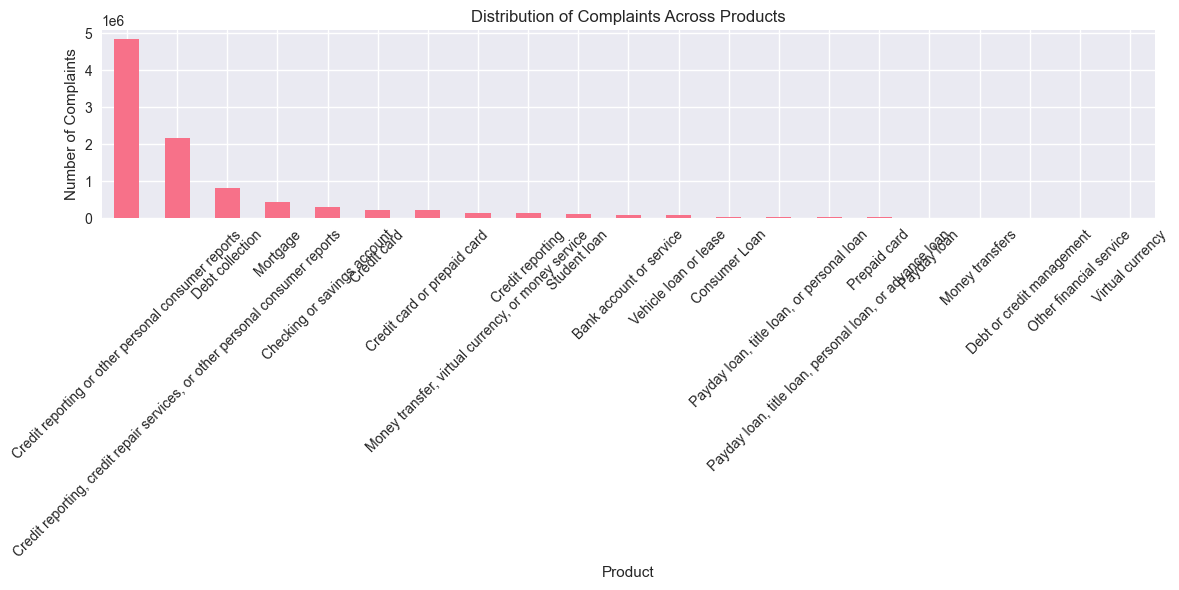

In [7]:
# Distribution of complaints across products
plt.figure(figsize=(12, 6))
df['Product'].value_counts().plot(kind='bar')
plt.title('Distribution of Complaints Across Products')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Analyzing Consumer complaint narrative:
Number of complaints with narratives: 2980756
Number of complaints without narratives: 6629041

Word count statistics for narratives:
Mean word count: 54.47
Median word count: 0.00
Min word count: 0
Max word count: 6469


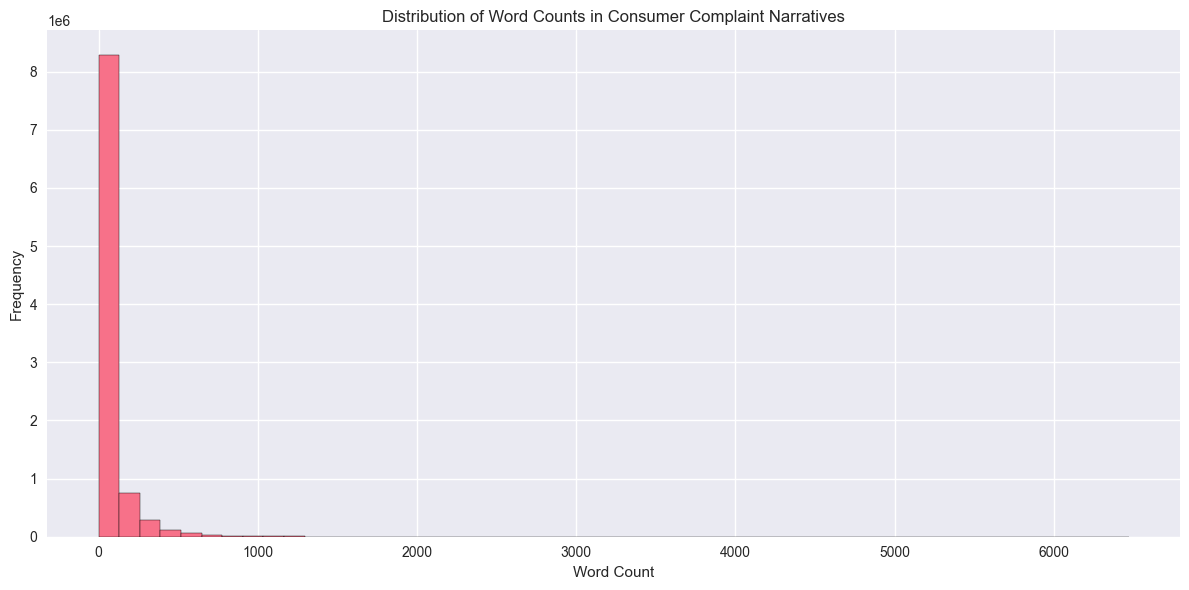

In [8]:
# Consumer complaint narrative analysis
print(f"\nAnalyzing Consumer complaint narrative:")

# Count non-null narratives
non_null_narratives = df['Consumer complaint narrative'].notna().sum()
print(f"Number of complaints with narratives: {non_null_narratives}")
print(f"Number of complaints without narratives: {df.shape[0] - non_null_narratives}")

# Calculate word counts
df['word_count'] = df['Consumer complaint narrative'].apply(
    lambda x: len(str(x).split()) if pd.notna(x) else 0
)

print(f"\nWord count statistics for narratives:")
print(f"Mean word count: {df['word_count'].mean():.2f}")
print(f"Median word count: {df['word_count'].median():.2f}")
print(f"Min word count: {df['word_count'].min()}")
print(f"Max word count: {df['word_count'].max()}")

# Plot word count distribution
plt.figure(figsize=(12, 6))
plt.hist(df['word_count'], bins=50, edgecolor='black')
plt.title('Distribution of Word Counts in Consumer Complaint Narratives')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Filtering and Cleaning Data

## Handling Missing Values

In [9]:
def filter_and_clean_data(df):
    """
    Filter and clean the dataset according to project requirements
    """
    print("\n" + "="*50)
    print("FILTERING AND CLEANING DATA")
    print("="*50)
    
    initial_count = df.shape[0]
    print(f"Initial number of complaints: {initial_count}")
    
    # Filter for the specified products
    target_products = [
        'Credit card', 'Credit Card', 'credit card',
        'Personal loan', 'Personal Loan', 'personal loan',
        'Savings account', 'Savings Account', 'savings account',
        'Money transfers', 'Money Transfers', 'money transfers'
    ]
    
    df_filtered = df[df['Product'].isin(target_products)].copy()
    print(f"After filtering for target products: {df_filtered.shape[0]} complaints")
    
    # Remove records with empty narratives
    df_filtered = df_filtered[df_filtered['Consumer complaint narrative'].notna()].copy()
    df_filtered = df_filtered[df_filtered['Consumer complaint narrative'].str.strip() != ''].copy()
    print(f"After removing records with empty narratives: {df_filtered.shape[0]} complaints")
    
    # Clean the text narratives
    # Lowercase text
    df_filtered['Consumer complaint narrative'] = df_filtered['Consumer complaint narrative'].str.lower()
    
    # Remove special characters (keeping letters, numbers, spaces, and basic punctuation)
    import re
    df_filtered['Consumer complaint narrative'] = df_filtered['Consumer complaint narrative'].apply(
        lambda x: re.sub(r'[^a-zA-Z0-9\s\.\,\!\?\;\:\-\(\)\'\"]', ' ', str(x)) if pd.notna(x) else x
    )
    
    # Remove extra whitespace
    df_filtered['Consumer complaint narrative'] = df_filtered['Consumer complaint narrative'].apply(
        lambda x: ' '.join(str(x).split()) if pd.notna(x) else x
    )
    
    print(f"Final filtered dataset shape: {df_filtered.shape}")
    print(f"Removed {initial_count - df_filtered.shape[0]} complaints ({((initial_count - df_filtered.shape[0])/initial_count)*100:.2f}%)")
    
    return df_filtered

In [10]:
# Apply filtering and cleaning
df_filtered = filter_and_clean_data(df)
df_filtered.head()


FILTERING AND CLEANING DATA
Initial number of complaints: 9609797
After filtering for target products: 232040 complaints
After removing records with empty narratives: 82164 complaints
Final filtered dataset shape: (82164, 19)
Removed 9527633 complaints (99.14%)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,word_count
12237,2025-06-13,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,a xxxx xxxx card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,2025-06-13,Closed with non-monetary relief,Yes,Unknown,14069121,91
13280,2025-06-12,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,"dear cfpb, i have a secured credit card with c...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11220,Unknown,Consent provided,Web,2025-06-13,Closed with monetary relief,Yes,Unknown,14047085,156
13506,2025-06-12,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account information incorrect,i have a citi rewards cards. the credit balanc...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,60067,Unknown,Consent provided,Web,2025-06-12,Closed with explanation,Yes,Unknown,14040217,233
13955,2025-06-09,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,b'i am writing to dispute the following charge...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78413,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,Unknown,13968411,454
14249,2025-06-09,Credit card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,"although the account had been deemed closed, i...",Company believes it acted appropriately as aut...,Atlanticus Services Corporation,NY,11212,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,Unknown,13965746,170


In [11]:
# Save the filtered data
def save_filtered_data(df, filepath):
    """
    Save the filtered and cleaned dataset
    """
    try:
        df.to_csv(filepath, index=False)
        print(f"Filtered dataset saved to {filepath}")
        print(f"Final dataset shape: {df.shape}")
    except Exception as e:
        print(f"Error saving dataset: {e}")

# Create data directory if it doesn't exist
os.makedirs("../data", exist_ok=True)
os.makedirs("../data/processed", exist_ok=True)

# Save the filtered data
save_filtered_data(df_filtered, "../data/processed/filtered_complaints.csv")

Filtered dataset saved to ../data/processed/filtered_complaints.csv
Final dataset shape: (82164, 19)


## Summary of Task 1

In this notebook, we have:
1. Loaded the complaint dataset (using a sample for demonstration)
2. Performed exploratory data analysis to understand the data distribution
3. Filtered the dataset to include only the specified products: Credit card, Personal loan, Savings account, and Money transfers
4. Removed records with empty consumer complaint narratives
5. Cleaned the text narratives by lowercasing, removing special characters, and normalizing whitespace
6. Saved the cleaned and filtered dataset to `data/processed filtered_complaints.csv`

The next steps would involve text chunking, embedding, and building the RAG pipeline.